In [2]:
import librosa
import librosa.display
import IPython.display as ipd  
# ipd contains utilities that we can use like display and listen audio on jupyter

In [20]:
# loading audio files

sample1_file= "audios/sample1.wav"
sample2_file= "audios/sample2.wav"
sample3_file= "audios/sample3.wav"    

In [21]:
ipd.Audio(sample1_file)

In [22]:
ipd.Audio(sample2_file)

In [23]:
ipd.Audio(sample3_file)

In [40]:
sample1, sr = librosa.load(sample1_file)  # we can change sr acc to us
sample2, _ = librosa.load(sample2_file)
sample3, _ = librosa.load(sample3_file)

In [27]:
sample1.size

739329

In [28]:
type(sample1)

numpy.ndarray

In [29]:
sample1

array([-0.00137766, -0.00202094, -0.00286619, ..., -0.01356363,
       -0.00691551,  0.        ], dtype=float32)

In [30]:
# duration of 1 sample
sample_duration =  1/sr
print("Duration of 1 sample is :", sample_duration)

Duration of 1 sample is : 4.5351473922902495e-05


In [37]:
# sample duration is very very short
# sample duration is not perceivable, so we will extract frames which we can perceive

# duration of audio signal in seconds

duration= sample_duration*sample1.size
print("Duration of the audio signal is :"+ str(np.round(duration))+" seconds" )

Duration of the audio signal is :34.0 seconds


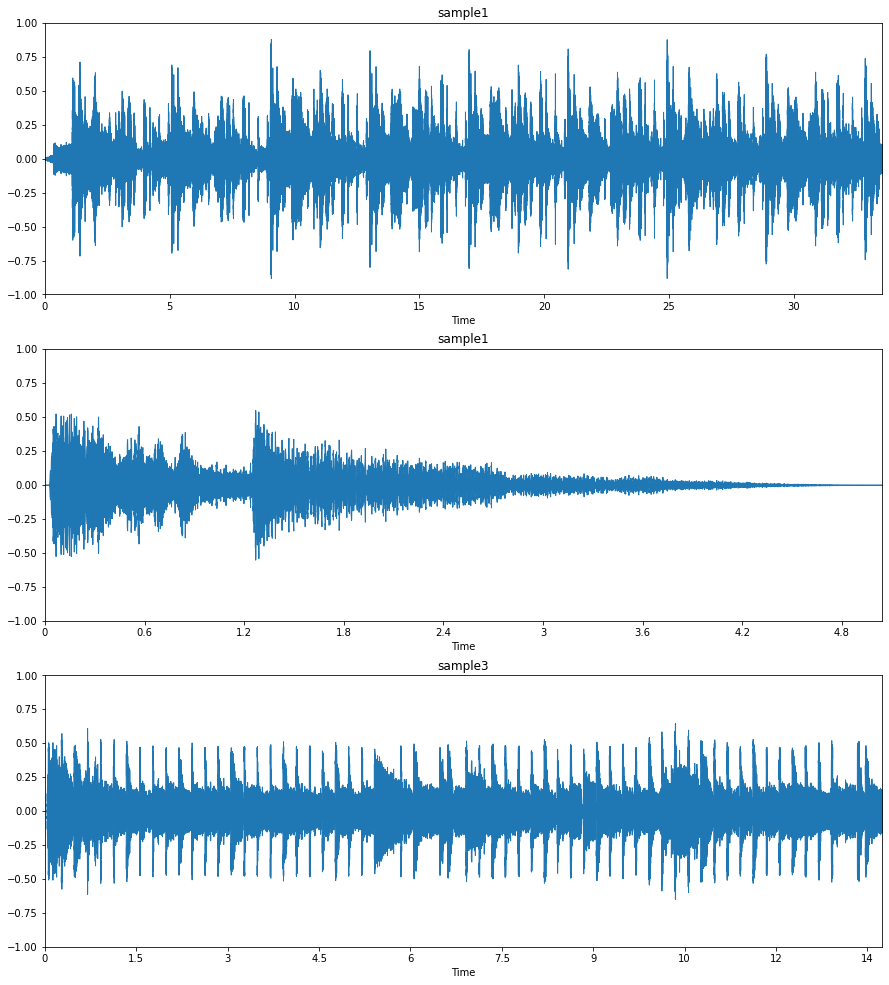

In [45]:
# visualize the waveform

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,17))  # 15 width, 17 height

# now we want 3 diff subplots

plt.subplot(3,1,1,alpha=0.5)   # 3 rows, 1 column,   and this is index 1 so (3,1,1)
librosa.display.waveplot(sample1)
plt.title("sample1")
plt.ylim((-1,1))
plt.subplot(3,1,2,alpha=0.5)   # 3 rows, 1 column,   and this is index 2 so (3,1,2)
librosa.display.waveplot(sample2)
plt.title("sample1")
plt.ylim((-1,1))
plt.subplot(3,1,3,alpha=0.5)   # 3 rows, 1 column,   and this is index 3 so (3,1,3)
librosa.display.waveplot(sample3)
plt.title("sample3")
plt.ylim((-1,1))
plt.show()


In [67]:
# calculation of Amplitude Envelope
import numpy as np


FRAME_SIZE=200  # legit number used standardily

HOP_LENGTH= 70  


def amplitude_env(signal,frame_size, hop_length):
    amplitude_envelope = []
            
    # calculating AE for each frame
    # in this range(0,n,hop_length)  3rd argument is how much we have to jump within range (hop length)
    for i in range(0,len(signal),hop_length):      
        current_frame_AE= max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_AE)
        
    return np.array(amplitude_envelope)

In [68]:
AE_sample1= amplitude_env(sample1,FRAME_SIZE,HOP_LENGTH)
AE_sample1.size

10562

In [62]:
AE_sample1

array([0.00448525, 0.00737178, 0.01223313, ..., 0.04121207, 0.00895203,
       0.        ], dtype=float32)

In [87]:

AE_sample1= amplitude_env(sample1,512,250)
AE_sample1.size

2958

In [83]:

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [88]:
sample1_AE=fancy_amplitude_envelope(sample1,512,250)
sample2_AE=fancy_amplitude_envelope(sample2,512,250)
sample3_AE=fancy_amplitude_envelope(sample3,512,250)

In [90]:
sample1_AE.size

2958

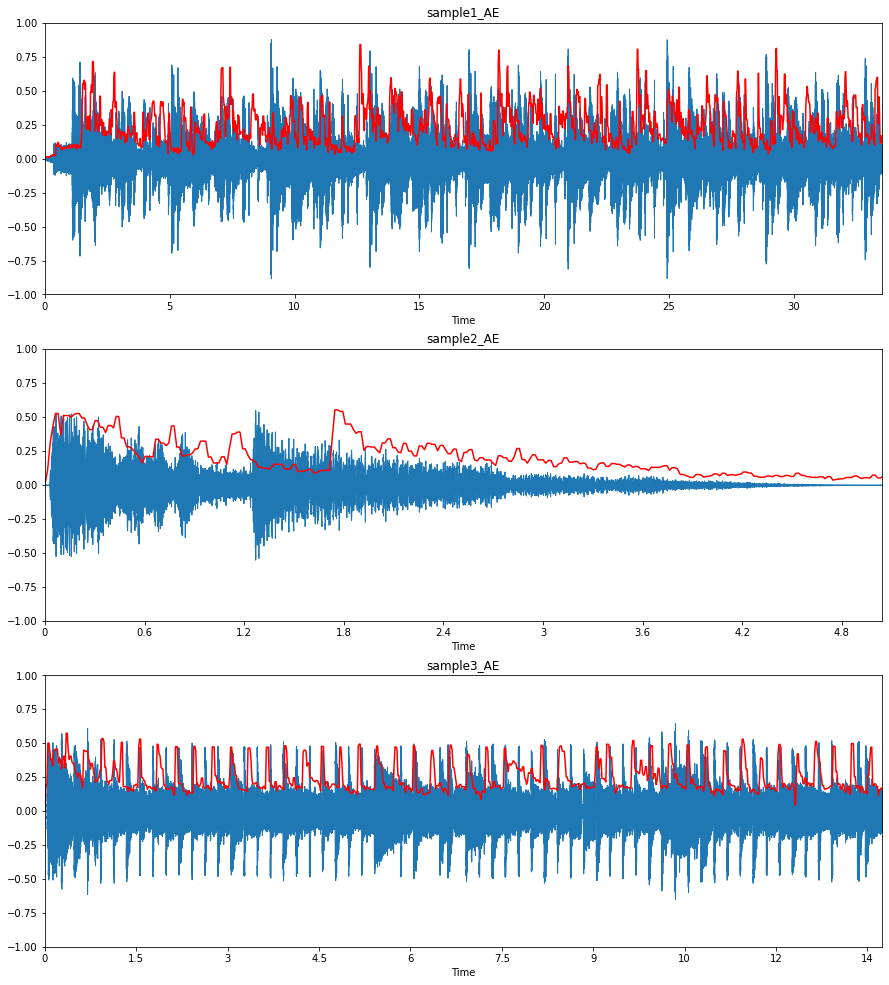

In [106]:
# visualize the Amplitude envelope for all audio signals/files

plt.figure(figsize=(15,17))  # 15 width, 17 height

# now we want 3 diff subplots
HOP_LENGTH=350
frames=range(sample1_AE.size)
t1=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)
frames2=range(sample2_AE.size)
t2=librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)

frames3=range(sample3_AE.size)
t3=librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)


plt.subplot(3,1,1,alpha=0.5)  
librosa.display.waveplot(sample1)
plt.plot(t1,sample1_AE,color="r")
plt.title("sample1_AE")
plt.ylim((-1,1))

plt.subplot(3,1,2,alpha=0.5)   
librosa.display.waveplot(sample2)
plt.plot(t2,sample2_AE,color="r")
plt.title("sample2_AE")
plt.ylim((-1,1))

plt.subplot(3,1,3,alpha=0.5)  
librosa.display.waveplot(sample3)
plt.plot(t3,sample3_AE,color="r")
plt.title("sample3_AE")
plt.ylim((-1,1))
plt.show()